In [1]:
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np

In [2]:
path = 'Sleep_health_and_lifestyle_dataset.csv'
sleep_df = pd.read_csv(path)
sleep_df.head(20)
    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
#Replacing normal weight and normal because theyre the same category
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace({'Normal Weight':'Normal'})
sleep_df["Sleep Disorder"].fillna("None",inplace=True)
#Seperate df for Normal
sleep2_df = sleep_df.loc[sleep_df['Sleep Disorder']!='Insomnia',:]
sleep2_df = sleep2_df.loc[sleep2_df['Sleep Disorder']!='Sleep Apnea',:]
#Seperate df for Sleep Apnea
sleep3_df = sleep_df.loc[sleep_df['Sleep Disorder']=='Sleep Apnea',:]
#Seperate df for Insomnia
sleep4_df = sleep_df.loc[sleep_df['Sleep Disorder']=='Insomnia',:]
sleep_df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


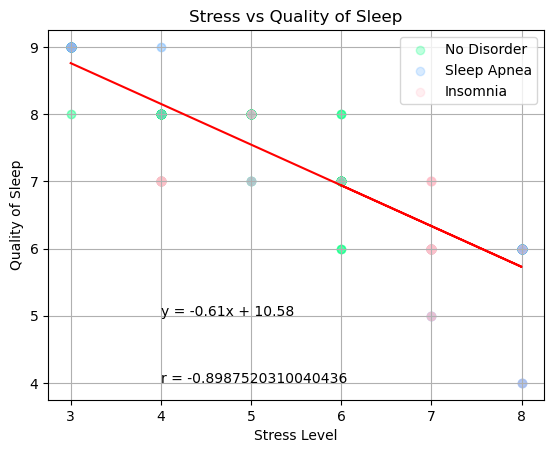

<Figure size 640x480 with 0 Axes>

In [4]:
#How does stress and quantity of sleep influence your quality of sleep?
#Linear regression for correlation coefficent
x = sleep_df['Stress Level']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#graphing all sleeping disorder categories seperately to see how they compare
plt.scatter(sleep2_df['Stress Level'],sleep2_df['Quality of Sleep'],alpha=.25,color="#00FF80")
plt.scatter(sleep3_df['Stress Level'],sleep3_df['Quality of Sleep'],alpha=.25,color="#66B2FF")
plt.scatter(sleep4_df['Stress Level'],sleep4_df['Quality of Sleep'],alpha=.25,color="pink")
#Formatting and addional graph info
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(4,5))
plt.annotate(f"r = {rvalue}",(4,4))
plt.title("Stress vs Quality of Sleep")
plt.ylabel("Quality of Sleep")
plt.xlabel("Stress Level")
plt.legend(["No Disorder","Sleep Apnea","Insomnia"])
plt.grid()
plt.show()
plt.savefig("Stress_Quality.png")

In [5]:
#Finding stats that I need
MedSD = sleep_df['Sleep Duration'].median()
MedQS = sleep_df['Quality of Sleep'].median()
print(MedQS,MedSD)
sleep_df.describe()

7.0 7.2


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


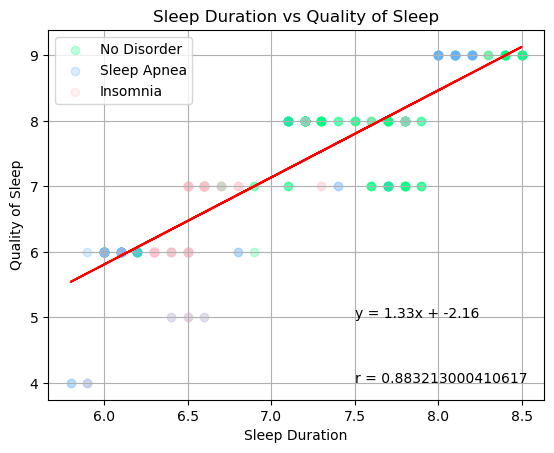

In [6]:
#Linear regression for correlation coefficent
x = sleep_df['Sleep Duration']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#graphing for Sleep duration vs quality of sleep
plt.scatter(sleep2_df['Sleep Duration'],sleep2_df['Quality of Sleep'],alpha=.25,color="#00FF80")
plt.scatter(sleep3_df['Sleep Duration'],sleep3_df['Quality of Sleep'],alpha=.25,color="#66B2FF")
plt.scatter(sleep4_df['Sleep Duration'],sleep4_df['Quality of Sleep'],alpha=.25,color="pink")
#Formatting
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(7.5,5))
plt.annotate(f"r = {rvalue}",(7.5,4))
plt.legend(["No Disorder","Sleep Apnea","Insomnia"])
plt.title("Sleep Duration vs Quality of Sleep")
plt.ylabel("Quality of Sleep")
plt.xlabel("Sleep Duration")
plt.grid()
plt.show
plt.savefig("SleepDuration_Quality")

<function matplotlib.pyplot.show(close=None, block=None)>

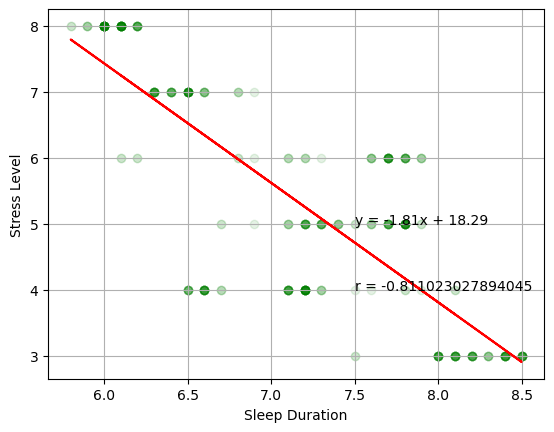

In [7]:
#Linear regression for correlation coefficent
x = sleep_df['Sleep Duration']
y = sleep_df['Stress Level']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Stress lvl vs quality of sleep
#Didnt do too much because I dont plan on using this graph
plt.scatter(sleep_df['Sleep Duration'],sleep_df['Stress Level'],alpha=.1,color="green")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(7.5,5))
plt.annotate(f"r = {rvalue}",(7.5,4))
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.grid()
plt.show

In [8]:
#Attempt at using chi square test but I dont have the right information to properly use it
# Doctors = sleep_df.loc[sleep_df['Occupation']=='Doctor',:]
# Nurse = sleep_df.loc[sleep_df['Occupation']=='Nurse',:]
# Engineer = sleep_df.loc[sleep_df['Occupation']=='Engineer',:]
# Lawyer = sleep_df.loc[sleep_df['Occupation']=='Lawyer',:]
# Teacher = sleep_df.loc[sleep_df['Occupation']=='Teacher',:]
# Accountant = sleep_df.loc[sleep_df['Occupation']=='Accountant',:]
# Software_Engineer = sleep_df.loc[sleep_df['Occupation']=='Software Engineer',:]
# Sales_Representative = sleep_df.loc[sleep_df['Occupation']=='Sales Representative',:]
# Scientist = sleep_df.loc[sleep_df['Occupation']=='Scientist',:]
# Manager = sleep_df.loc[sleep_df['Occupation']=='Manager',:]
# Doctors["Sleep Duration"].mean()
# observed = pd.Series([Doctors["Sleep Duration"].mean(),Nurse["Sleep Duration"].mean(),Engineer["Sleep Duration"].mean(),Lawyer["Sleep Duration"].mean(),Teacher["Sleep Duration"].mean(),Accountant["Sleep Duration"].mean(),Software_Engineer["Sleep Duration"].mean(),Sales_Representative["Sleep Duration"].mean(),Scientist["Sleep Duration"].mean(),Manager["Sleep Duration"].mean()],index = ["Doctor", "Nurse","Engineer","Lawyer","Teacher","Accountant","Software_Engineer","Sales_Representative","Scientist","Manager"])
# df = pd.DataFrame([observed]).T     
# df[1] = sleep_df["Sleep Duration"].mean()
# df
# critcal_value = stats.chi2.ppf(q=0.95,df=2)critcal_value = stats.chi2.ppf(q=0.95,df=9)
# stats.chisquare(df[0],df[1])

F_onewayResult(statistic=16.433956757151233, pvalue=2.4760422792956595e-22)

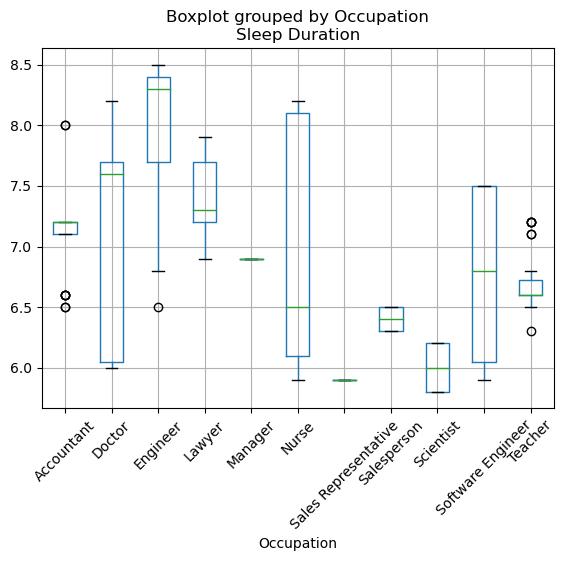

In [9]:
#Anova test for Occupation and Sleep duration
df2 = pd.DataFrame(sleep_df["Occupation"])
df2[1] = sleep_df["Sleep Duration"]
df2 = df2.rename(columns={0:"Occupation",1:"Sleep Duration"})
df2.boxplot("Sleep Duration", by = "Occupation",rot=45)
#Setting up the groups/Probably could have done it a better way
g1 = df2[df2['Occupation']=='Doctor']["Sleep Duration"]
g2 = df2[df2['Occupation']=='Nurse']["Sleep Duration"]
g3 = df2[df2['Occupation']=='Engineer']["Sleep Duration"]
g4 = df2[df2['Occupation']=='Lawyer']["Sleep Duration"]
g5 = df2[df2['Occupation']=='Teacher']["Sleep Duration"]
g6 = df2[df2['Occupation']=='Accountant']["Sleep Duration"]
g7 = df2[df2['Occupation']=='Software Engineer']["Sleep Duration"]
g8 = df2[df2['Occupation']=='Sales Representative']["Sleep Duration"]
g9 = df2[df2['Occupation']=='Scientist']["Sleep Duration"]
g10 = df2[df2['Occupation']=='Manager']["Sleep Duration"]
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)


F_onewayResult(statistic=32.51020214926935, pvalue=7.315462009074077e-14)

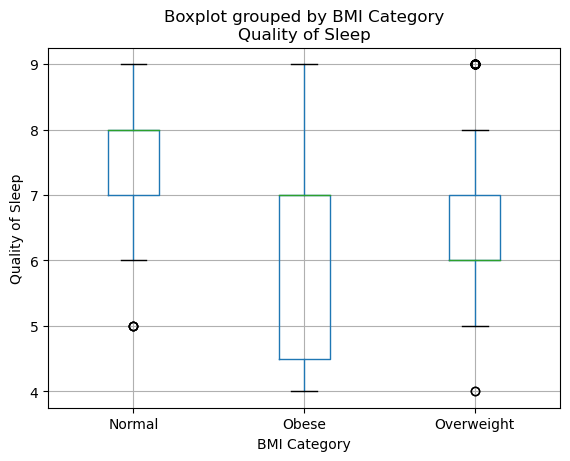

In [10]:
#Anova on BMI categoies vs quality of sleep
#How does your weight/BMI category influence your quality of sleep
df3 = pd.DataFrame(sleep_df["BMI Category"])
df3[1] = sleep_df["Quality of Sleep"]
df3 = df3.rename(columns={0:"BMI Category",1:"Quality of Sleep"})
df3.boxplot("Quality of Sleep", by="BMI Category")
plt.ylabel("Quality of Sleep")
gr1 = df3[df3["BMI Category"]=="Normal"]["Quality of Sleep"]
gr2 = df3[df3["BMI Category"]=="Overweight"]["Quality of Sleep"]
gr3 = df3[df3["BMI Category"]=="Obese"]["Quality of Sleep"]
stats.f_oneway(gr1,gr2,g3)

F_onewayResult(statistic=17.412000191427445, pvalue=1.3883302958502746e-23)

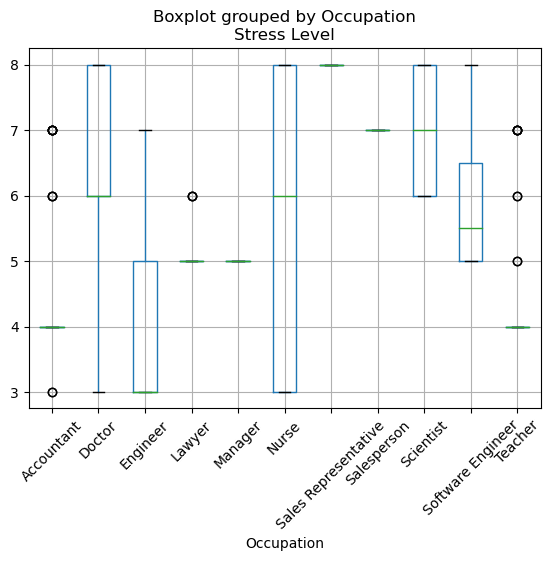

In [11]:
df2 = pd.DataFrame(sleep_df["Occupation"])
df2[1] = sleep_df["Stress Level"]
df2 = df2.rename(columns={0:"Occupation",1:"Stress Level"})
df2.boxplot("Stress Level", by = "Occupation",rot=45)
g1 = df2[df2['Occupation']=='Doctor']["Stress Level"]
g2 = df2[df2['Occupation']=='Nurse']["Stress Level"]
g3 = df2[df2['Occupation']=='Engineer']["Stress Level"]
g4 = df2[df2['Occupation']=='Lawyer']["Stress Level"]
g5 = df2[df2['Occupation']=='Teacher']["Stress Level"]
g6 = df2[df2['Occupation']=='Accountant']["Stress Level"]
g7 = df2[df2['Occupation']=='Software Engineer']["Stress Level"]
g8 = df2[df2['Occupation']=='Sales Representative']["Stress Level"]
g9 = df2[df2['Occupation']=='Scientist']["Stress Level"]
g10 = df2[df2['Occupation']=='Manager']["Stress Level"]
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)


In [12]:
group = sleep_df.groupby(["BMI Category"])["Quality of Sleep"]
print(group)
group.mean()

BMI Category
Normal        7.638889
Obese         6.400000
Overweight    6.898649
Name: Quality of Sleep, dtype: float64

In [55]:
group = sleep_df.groupby(["BMI Category"])['Sleep Disorder']
group.count()
test = sleep_df.loc[(sleep_df['Sleep Disorder']=='Insomnia')&(sleep_df['BMI Category']=="Overweight"),:]
sleep_df.count()


Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

F_onewayResult(statistic=363.29427331803237, pvalue=1.0558675307651882e-86)

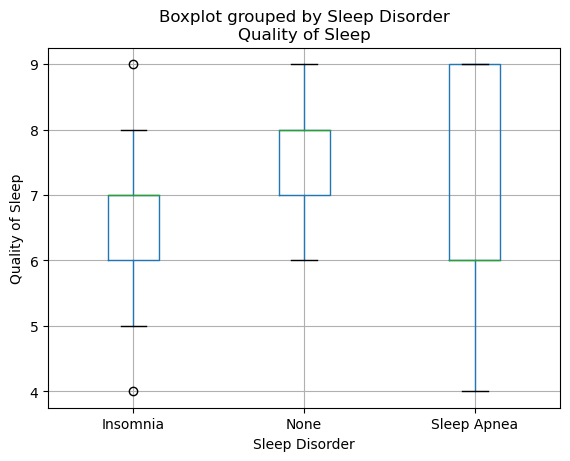

In [14]:
df3 = pd.DataFrame(sleep_df["Sleep Disorder"])
df3[1] = sleep_df["Quality of Sleep"]
df3 = df3.rename(columns={0:"Sleep Disorder",1:"Quality of Sleep"})
df3.boxplot("Quality of Sleep", by="Sleep Disorder")
plt.ylabel("Quality of Sleep")
gr1 = df3[df3["Sleep Disorder"]=="None"]["Quality of Sleep"]
gr2 = df3[df3["Sleep Disorder"]=="Insomnia"]["Quality of Sleep"]
gr3 = df3[df3["Sleep Disorder"]=="Sleep Apnea"]["Quality of Sleep"]
stats.f_oneway(gr1,gr2,g3)
